The following are details of statistical comparisons performed by H. Passmore in partial completion of the Capstone 1 project for Springboard's Data Science Career Track Program. 

__Assignment Details:__
At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

__Submission:__ Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

# Inferential Statistics for Capstone 1
_Amazon Book Reviews & Ratings Predictor_
***

## Summary of Project Data
The data for this ratings predictor project are Amazon book reviews for 729 different published books in the genre "Non-fiction Science and Textbooks". The dataset comprises 11546 reviews where many books are reviewed once, and some are reviewed by over 100 different reviewers. The highest review count per book is 382 with an average of 16 reviews per book.

Quantitative features of the dataset include: 

   * word count
   * character count  
   * estimated length of the longest word. 

Categorical features include: 

   * Overall star rating assigned by each reviewer, ranging from 1 to 5 stars (5 is the highest)
   * High/Medium/Low ratings groupings where 
       * High = 5-stars, (n = 7662)
       * Medium = 3 and 4-stars, (n = 2874)
       * Low = 1 and 2-stars, (n = 1010)
   * ratings over time (time series) for books with many reviews (>100)


Patterns of note: 
* Five-star ratings are the most common, 66% of this subset of reviews are 5-star reviews, and they out number all other star-ratings combined. This proprotion of highly rated books mirrors the proportion of five-star reviews in the source dataset of 22,507,155 book reviews (McAuley et al. 2015, He & McAuley 2016).
* The longest reviews are associated with the 5-star and 1-star ratings categories, respectively.
* Observations of the most frequently reviewed books indicates that high and low ratings are evenly distributed over time (no trend apparent).
* Most frequently reviewed books usually had more reviews early in the time series but some were reviewed more in the middle of the time series.

## Analysis of Review Text Characteristics
To further explore patterns and differences in categorical features of the book review data set I explored the distribution of review length (measured by word count) across the different levels of star ratings. Count data are often not normally distributed, and these data were predictibly skewed with fewer reviews being much longer than the majority. To make comparisons between the different star-ratings I first log-transformed the word count data. The log-transformation smoothed out the Q-Q plot. To compare review word counts for low and high rated books I used an independent two-sample t-test for unequal variances. The hypotheses of interest are:

__Null Hypothesis:__ Review length is equal for high and low rated reviews. Specifically [5] vs. [1+2] stars.

__Alternative Hypothesis:__ Review lenghts are not equal for high and low rated reviews.

Results of this test on the log-transformed word counts indicate that the word count of 'low' rated reviews is significantly higher than 'high' rated reviews (t = 13.7, p = 0.00).

__Future Directions:__ Reviews have MM-DD-YYYY formatted dates of submission. A time series analysis of ratings over time is possible for books with many reviews (>100). Would this analysis contribute to our ability to predict ratings from text?

## Analysis of Review Contents
An initial application of a Multinomial Naive Bayes classifier model with default parameters on training and test review text results in accuracy scores of 0.846172 for the training data and 0.738136 accuracy score for the test data. This indicates that the Naive Bayes model is not overfit for these data, but that the model does not generalize well.

Additional models, coming soon:

n-grams

TF-IDF


## Summary of Findings

* Review text for the five Amazon ratings levels is variable and patterns are not strongly obvious.
* There are statistical differences between reviews for high and low rated books in this genre. Log-transformed word counts are longer for 'low' rated reviews using an indepdenent two-sample t-test for unequal variances.
* A basic classification model using Multinomial Naive Bayes has 85% accuracy for training data and 74% accuracy for predicting rating level on test data.


### Sources:
Ruining He and Julian McAuley. 2016. Ups and Downs: Modeling the Visual Evolution of Fashion Trends with One-Class Collaborative Filtering. In Proceedings of the 25th International Conference on World Wide Web (WWW '16). International World Wide Web Conferences Steering Committee, Republic and Canton of Geneva, Switzerland, 507-517. DOI: https://doi.org/10.1145/2872427.2883037
 
Julian McAuley, Christopher Targett, Qinfeng Shi, and Anton van den Hengel. 2015. Image-Based Recommendations on Styles and Substitutes. In Proceedings of the 38th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR '15). ACM, New York, NY, USA, 43-52. DOI: http://dx.doi.org/10.1145/2766462.2767755

### Below is the code for statistical analyses associated with this report.

In [5]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import numpy as np

# Build figures inline, set visualization style
%matplotlib inline
sns.set()

In [45]:
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# bring the reviews and word counts dataframe into workspace
# import pickle
# load the pickled  DataFrame of Science Textbook Reviews from hard drive in 'rb' mode
import pickle
with open('reviews_counts.pickle','rb') as f:
    sci_revs = pickle.load(f)

In [3]:
# create new low/med/high variable
import numpy as np
sci_revs['low_high'] = np.where((sci_revs['overall']> 0) & (sci_revs['overall']<=2), 'low', 
                                np.where((sci_revs['overall'] > 2) & (sci_revs['overall']<=4), 'med' , 'high'))
sci_revs.head()

,_id,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,words,word_count,long_word,longest,char_length,low_high
0,5a1f057530ec5f57e705fb9f,0006531644,"[0, 1]",4,This is a good book for the science nerd and t...,"07 9, 2012",A2T1HLL9IPHEP1,plc86,A Great Read,1341792000,"[This, is, a, good, book, for, the, science, n...",33,"information,",12,185,med
1,5a1f057530ec5f57e705fba0,0006531644,"[0, 0]",5,"If you're a biology/genetics enthusiast, this ...","05 1, 2013",A1GP2V4NYRK36P,savvy reviewer,Very interesting reading,1367366400,"[If, you're, a, biology/genetics, enthusiast,,...",39,biology/genetics,16,228,high
2,5a1f057530ec5f57e7060b85,0007116837,"[1, 1]",4,I bought this for my daughter who borrowed all...,"04 5, 2008",A3KTFMHASRH0VE,"Randal L. Zelhart ""Lee Zelhart""",Another McCourt,1207353600,"[I, bought, this, for, my, daughter, who, borr...",52,daughter,8,255,med
3,5a1f057530ec5f57e7060b86,0007116837,"[1, 1]",4,This book was recommended by a tour guide in I...,"10 3, 2009",A36QKTOEIXPNTH,"T. Lockhart ""Navigator lady""",A Monk Swimming,1254528000,"[This, book, was, recommended, by, a, tour, gu...",23,recommended,11,116,med
4,5a1f058730ec5f57e7078448,0028255267,"[3, 3]",5,Our school recently upgraded to this chemistry...,"09 3, 2000",AJ8F4IJXY6OT9,A Customer,very thorough chem book...,967939200,"[Our, school, recently, upgraded, to, this, ch...",102,"instructions,",13,612,high


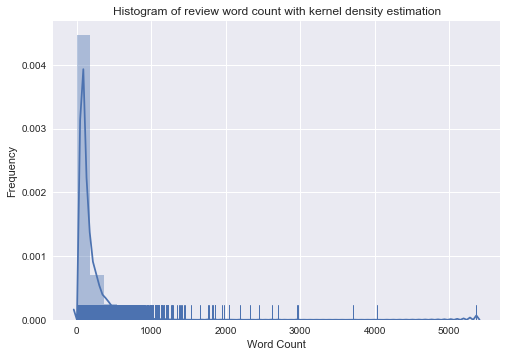

In [6]:
# view a histogram of word counts
sns.distplot(sci_revs.word_count, bins= 30, kde=True, rug=True);
plt.title('Histogram of review word count with kernel density estimation');
plt.xlabel('Word Count');
plt.ylabel('Frequency');

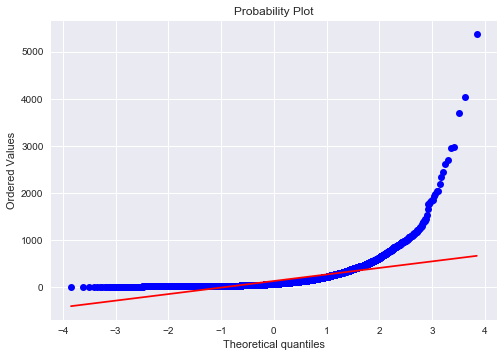

In [11]:
# check normality with Q-Q plot
scipy.stats.probplot(sci_revs.word_count, dist='norm', fit=True, plot=plt);

In [7]:
small_df = pd.DataFrame(sci_revs[['asin','overall','reviewText', 'reviewerID', 'summary', 'word_count', 'longest',
                                 'char_length', 'low_high']])
small_df.head()

,asin,overall,reviewText,reviewerID,summary,word_count,longest,char_length,low_high
0,0006531644,4,This is a good book for the science nerd and t...,A2T1HLL9IPHEP1,A Great Read,33,12,185,med
1,0006531644,5,"If you're a biology/genetics enthusiast, this ...",A1GP2V4NYRK36P,Very interesting reading,39,16,228,high
2,0007116837,4,I bought this for my daughter who borrowed all...,A3KTFMHASRH0VE,Another McCourt,52,8,255,med
3,0007116837,4,This book was recommended by a tour guide in I...,A36QKTOEIXPNTH,A Monk Swimming,23,11,116,med
4,0028255267,5,Our school recently upgraded to this chemistry...,AJ8F4IJXY6OT9,very thorough chem book...,102,13,612,high


In [8]:
# The number of words per review are count data and predictably non-normal
# Log transform 'word_count' to improve normality
# there are better ways to deal with non-normal count data (e.g., Poisson model), but log transforming helps with EDA
small_df = small_df.assign(log_count = lambda x: np.log(x.word_count))
small_df.head()

,asin,overall,reviewText,reviewerID,summary,word_count,longest,char_length,low_high,log_count
0,0006531644,4,This is a good book for the science nerd and t...,A2T1HLL9IPHEP1,A Great Read,33,12,185,med,3.496508
1,0006531644,5,"If you're a biology/genetics enthusiast, this ...",A1GP2V4NYRK36P,Very interesting reading,39,16,228,high,3.663562
2,0007116837,4,I bought this for my daughter who borrowed all...,A3KTFMHASRH0VE,Another McCourt,52,8,255,med,3.951244
3,0007116837,4,This book was recommended by a tour guide in I...,A36QKTOEIXPNTH,A Monk Swimming,23,11,116,med,3.135494
4,0028255267,5,Our school recently upgraded to this chemistry...,AJ8F4IJXY6OT9,very thorough chem book...,102,13,612,high,4.624973


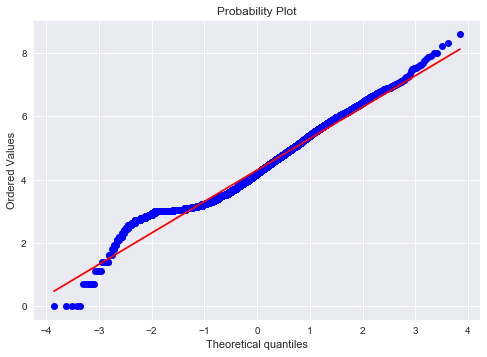

In [10]:
# check normality again with Q-Q plot
scipy.stats.probplot(small_df.log_count, dist='norm', fit=True, plot=plt);

In [12]:
import numpy as np
# calculate sample statistics
mu = np.mean(small_df.log_count)
std = np.std(small_df.log_count, ddof=0) # the default calculation (ddof=0) estimates the population standard deviation
n = len(small_df.log_count)
print('The sample mean is ', '{0:0.3f}'.format(mu))
print('The sample standard deviation that estimates the population std is ', '{0:0.3f}'.format(std))
print('The sample size is ', n)

The sample mean is  4.298
The sample standard deviation that estimates the population std is  1.008
The sample size is  11546


In [14]:
groupby_rating = small_df['log_count'].groupby(small_df['low_high'])
groupby_rating

In [15]:
groupby_rating.mean()

low_high
high    4.192534
low     4.669839
med     4.449925
Name: log_count, dtype: float64

In [16]:
groupby_rating.describe()

,count,mean,std,min,25%,50%,75%,max
low_high,,,,,,,,
high,7662.0,4.192534,0.963172,0.000000,3.401197,4.060443,4.836282,8.587465
low,1010.0,4.669839,1.045670,0.693147,3.871201,4.663439,5.409404,8.300777
med,2874.0,4.449925,1.060431,0.000000,3.555348,4.406719,5.245705,7.751905


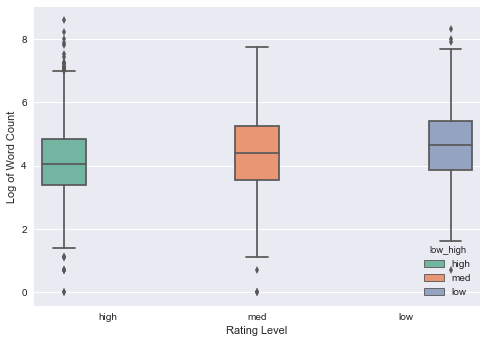

In [24]:
sns.boxplot(x='low_high', y='log_count', data=small_df, hue='low_high', order=['high', 'med', 'low'], 
            hue_order=['high', 'med', 'low'], palette='Set2', width=0.9);
plt.xlabel('Rating Level');
plt.ylabel('Log of Word Count');

In [25]:
# check out the male and female sample sizes
high_count = small_df.log_count[small_df.low_high == 'high']
low_count = small_df.log_count[small_df.low_high == 'low']
print('High rating sample size is', len(high_count))
print('Low rating sample size is', len(low_count))

High rating sample size is 7662
Low rating sample size is 1010


In [31]:
# perform hypothesis test with two-sided independent t-test for unequal variances
tstat, p_value = scipy.stats.ttest_ind(low_count, high_count, equal_var=False)
print('Tests statistic', '{0:0.3f}'.format(tstat))
print('P-value of test', '{0:0.3f}'.format(p_value))
if p_value < 0.05:
    print('Reject the Null hypothesis: There is a difference between word counts for high and low rated reviews.')
else:
    print('Fail to reject the Null: There is no difference between word counts for high and low rated reviews.')

Tests statistic 13.758
P-value of test 0.000
Reject the Null hypothesis: There is a difference between word counts for high and low rated reviews.


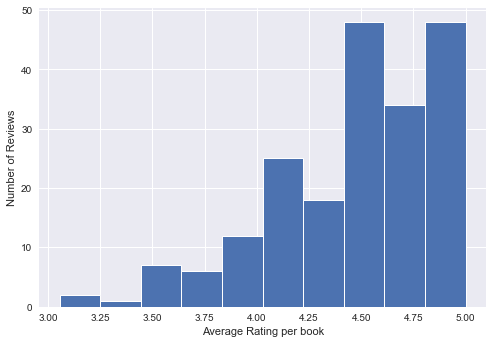

In [35]:
grp = small_df.groupby('asin')
counts = grp.asin.count()  # number of reviews per book
means = grp.overall.mean()     # average rating for each book

means[counts > 10].hist(bins=10, edgecolor='w', lw=1);
plt.xlabel("Average Rating per book");
plt.ylabel("Number of Reviews");
# for books (asin) reviewed by more than 10 reviewers the mean ratings are most frequently 4+

## Begin analysis of review content, split train and test data sets
For text data, when should I split (train/test) - before vectorizing or after?
Comment from Springboard community (credit to Rohit Dixit, student) 

Vectorize then split

If we vectorize then we train/test split, our document-term matrix would contain every single feature (word) in the test and training sets
What we want is to simulate the real world
We would always see words we have not seen before so this method is not realistic and we cannot properly evaluate our models

Split then vectorize (correct way)

We do the train/test split before the CountVectorizer to properly simulate the real world where our future data contains words we have not seen before

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
# should I use this function? Have I set it up right?
def make_xy(small_df, vectorizer=None):
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(small_df.reviewText)
    X = X.tocsc()  
    y = (small_df.low_high == 'high').values.astype(np.int) # am I defining 'y' correctly? Okay to have high, med, low?
    return X, y
X, y = make_xy(small_df)

In [40]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [41]:
# use scikit-learn's MultinomailNB() classifier with default parameters
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
# train the classifier over the training set and test on the test set
base_train = classifier.score(x_train, y_train)
base_test = classifier.score(x_test, y_test)

In [43]:
# print the accuracy scores for both the training and the test sets
print("Accuracy score for the train data is: %.6f." % base_train)
print("Accuracy score for the test data is: %.6f." % base_test)

Accuracy score for the train data is: 0.846172.
Accuracy score for the test data is: 0.738136.


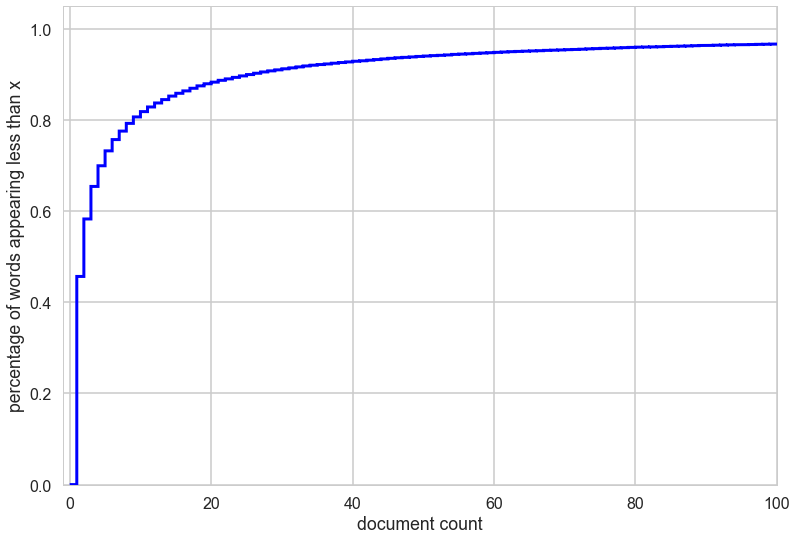

In [46]:
# build cumulative distribtution of document frequencies (df) 
words = list((X > 0).sum(0).tolist()[0])
w = pd.Series(words)
y = np.arange(w.sum())
plt.hist(w,y,normed=1, histtype='step', color='b', cumulative=True, linewidth=3)
plt.xlim(-1,100) 
plt.xlabel('document count')
plt.ylabel ('percentage of words appearing less than x')

In [47]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [ ]:
# can't do the log liklihood function with three categories?
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y == 0 # low?
    fresh = ~rotten # high? Can I also include prob of med?
    return prob[rotten, 0].sum() + prob[fresh, 1].sum() # sum of three probabilities?

Still need to find best classifiers.

In [ ]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0] # do not have log-likelihood function working yet
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good words\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))